## Miro User Insights Analytics Manager assignment 

#### Request to analytics
Whereas the product team is working on V2 of Grids, user’s feedback is considered a
valuable source to formulate requirements for the next version of this feature. As a user's
insights analytics manager you need to identify core user’s issues / advancements -> and to
make suggestions of what should we focus on / take into account while developing new Grids.
Your specific tasks:
1. Register in Miro and check Grids
2. Check provided data, decide which is relevant and should be used
3. Consider searching blogs / social media for extra data points
4. Prepare the data use SQL, R, Python, Excel according to the required structure
5. Analyse the data (utilising NLP techniques in advantageous).
6. Overview your insights, suggest up to 3 hypotheses and corresponding product improvements that will enhance the value of Grids.

#### Dataset:
<img src="Desktop/Capture.jpg">
<img src="Desktop/Capture2.jpg">


#### Before start our analysis, I think that is important to think about some business questions:

<ul>
<li><a href="#Question1">1. What is the profile of our users who gave the feedback on the grid feature? Roles and segments. **(Feature feedback  +  role + segment)**</a></li>
<li><a href="#Question2">2. What is total average /median score of the feedback? What is percentage of each score on the feedback? How many people like or dislike this feature? **(Feature feedback  +  role + segment)**</a></li>
<li><a href="#Question3">3. Who are the people most like the product? who are the people most dislike this product? **(Feature feedback  +  role + segment)**</a></li>
<li><a href="#Question4">4. What insights we can get from the feedback text from the users? What technique or methodology we can use to understand the feedback? **(Feature feedback)**</a></li>
<li><a href="#Question5">5. What are the most frequent words appears on the 1-5 score feedback on Grids feature? Will these words give us insights? **(Feature feedback)**</a></li>
<li><a href="#Question6">6. What are the most relevant keywords appears on the 1-5 score feedback on Grids feature? Will these words give us insights? **(Feature feedback)**</a></li>
<li><a href="#Question7">7. The people who liked or disliked this product also gave opinion in NPS survey? **(Feature feedback + NPS)**</a></li>
<li><a href="#Question8">8. What was the score the people who sent feature feedback gave on NPS? **(Feature feedback + NPS)**</a></li>
<li><a href="#Question9">9. Do these people possibly increase or decrease their NPS score based on the experienced with Grids feature? **(Feature feedback + NPS)**</a></li>
<li><a href="#Question10">10. What insights we can get from the feedback text from the users? What technique or methodology we can use to understand the feedback? **(Feature feedback)**</a></li>
<li><a href="#Question11">11. How many NPS feedback are related to grids feature? **(NPS)**</a></li>
<li><a href="#Question12">12. Are the people who gave grid feature related NPS feedbacks promotors? passive? or detractor? **(NPS)**</a></li>
<li><a href="#Question13">13. What we can learn from these feedbacks? What technique or methodology we can use to understand the feedback? **(NPS)**</a></li>
<li><a href="#Question14">14. Are there tickets talking/complaining about grids feature? how many are? **(Support tickets)**</a></li>
<li><a href="#Question15">15. How can we understand the sentiment that these tickets gave to use? Negative? Positive or Neutral? (**(Support tickets)**</a></li>
<li><a href="#Question16">16. What are the main topic of these tickets? **(Support tickets)**</a></li>
<li><a href="#Question17">17. What are the most frequent and most relevant keywords appear in these tickets? **(Support tickets)**</a></li>
<li><a href="#Question18">18. Finally, how can we use these text analysis and demographic analysis to give improvement suggestion for product team? </a></li>
<ul>

#### Now we can also see some NLP technique I am going to apply on the text analysis:

- **Feature Feedback text data:**
    - Words cleanning and tokenizing
    - Most frequent words analysis
    - Word sequence/N-gram analysis
    - Tf-Idf analysis
    

- **NPS text data:**
    - Words filtering
    - Words cleanning
    - Manual analysis for few tickets (if less than 10 texts)
    
    
- **Support Ticket text data:**
    - Words cleanning
    - Sentiment analysis
    - LDA Topic Modeling (Latent Dirichlet Allocation)
    - Tf-Idf analysis
    - N-gram analysis
    - Manual analysis for few tickets (if less than 10 texts)
    

### Import all the necessary libraries for my analysis

In [507]:
from IPython.display import Image
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import datetime as dt
import re
import sys
import nltk
import os
import statistics
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag.stanford import StanfordNERTagger
from nltk import ngrams
import unicodedata
import unidecode
import plotnine
from plotnine import *
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saizh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saizh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saizh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saizh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Read all the data into my notebook

In [417]:
ff = pd.read_csv('feature_feedback.csv', dtype = {'user_id':'str'})
nps = pd.read_csv('nps.csv',dtype = {'user_id':'str'})
role = pd.read_csv('roles.csv',dtype = {'user_id':'str'})
segment = pd.read_csv('segments.csv',dtype = {'user_id':'str'})
ticket= pd.read_csv('support_tickets.csv',dtype = {'user_id':'str'})

### The size of data

In [405]:
print('Row and column number of feature_feedback.csv: {}'.format(ff.shape))
print('Row and column number of nps.csv: {}'.format(nps.shape))
print('Row and column number of support_tickets.csv: {}'.format(ticket.shape))
print('Row and column number of roles.csv: {}'.format(role.shape))
print('Row and column number of segments.csv: {}'.format(segment.shape))

Row and column number of feature_feedback.csv: (1622, 3)
Row and column number of nps.csv: (441, 3)
Row and column number of support_tickets.csv: (4110, 2)
Row and column number of roles.csv: (4733, 3)
Row and column number of segments.csv: (6059, 2)


In [418]:
# rename the column names
ff = ff.rename(columns={'text': 'text_ff'})
nps = nps.rename(columns={'text': 'text_nps'})
ticket = ticket.rename(columns={'text': 'text_ticket'})

### Create our first analytical dataset: Feature_feedback + Role + Segment

In [420]:
ff['FF_Score'] = ff['FF_Score'].fillna(0.0).astype(int)

In [421]:
segment = segment.drop_duplicates(subset = 'user_id', keep = 'last')
print(segment.shape)
segment.head()

(4733, 2)


,user_id,segment
0,3074457347877331038,Free
1,3074457346942034216,Free
4,3074457347736790169,Free
6,3074457348156222366,Free
7,3074457347469608721,Free


In [422]:
df_ff = ff.merge(role, on='user_id', how='left')
df_ff = segment.merge(df_ff, on='user_id', how='inner')
df_ff.shape

(1622, 6)

In [410]:
df_ff['FF_Score'] = df_ff['FF_Score'].fillna(0.0).astype(int)
df_ff['functional_role'] = df_ff['functional_role'].fillna('Not detected')

In [411]:
df_ff.head()

,user_id,segment,text_ff,FF_Score,user_registered_date,functional_role
0,3074457347877331038,Free,"double click on a cell to insert text doesn't work, it highlight all the grid",1,2020-05-06,Not detected
1,3074457347736790169,Free,banyakin lagi templatenya,4,2020-04-25,UX/UI Designer
2,3074457347469608721,Free,"just a table, not very functional. also would be easier to use if i can just drag and drop in elements such as boxes in the main body of the gantt",1,2020-04-17,Not detected
3,3074457346899585386,Free,"based on the amount of text some items may have, it can be difficult to differentiate item from item in the small drop-down results menu. this is especially the case for tags - the tag name often hides most or all of the element's actual text. i may be missing the option somewhere, but the ability to expand the search results view to have a much larger view would make it much more useful (why not put it in the left-aligned panel where all of the other navigation aids are, like jumping to frames, comments, cards, etc.).",2,2019-10-02,Not detected
4,3074457346899585386,Free,"great feature! doesn't seem to honor locking, though - when locked i was still able to add columns and rows, add text within cells, etc. also, when multi selecting sticky notes within a cell, that neat new feature for dragging the group to more/less columns doesn't appear to be available (the little four-arrow icon that appears in the upper-right corner when a group of stickies are selected). it would also be neat to set max height/width with anchors, so that even as columns or rows expand when content within causes it, the overall table perimeter remains fixed.",4,2019-10-02,Not detected


<a id='Question1'></a>
### Question 1: What is the profile of our users who gave the feedback on the grid feature? Roles and segments.

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [379]:
df_ff['functional_role'].value_counts().to_frame()

,functional_role
Not detected,288
UX/UI Designer,214
Developer,180
Product,163
Company_management,139
Other,89
Project,89
Consultant,88
Marketing&Sales,77
Operations,73


In [433]:
def plot_bar_graph(df, color, title):
    
    ax = df.value_counts().plot(kind='bar',\
              figsize=(5,4), fontsize=12, width = 0.8, color = color, zorder=3)

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_facecolor('whitesmoke')
        ax.grid(color = 'w', zorder=0)
        ax.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
        plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

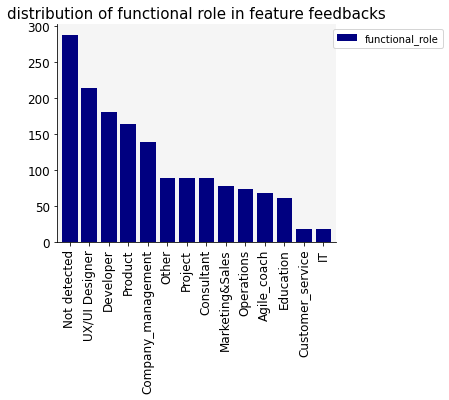

In [437]:
plot_bar_graph(df_ff['functional_role'], 'navy',"distribution of functional role in feature feedbacks")

In [461]:
def plot_pie_graph(labels, sizes, explode, title):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)
    
    ax1.axis('equal')  
    plt.title(title)
    plt.tight_layout()
    plt.show()

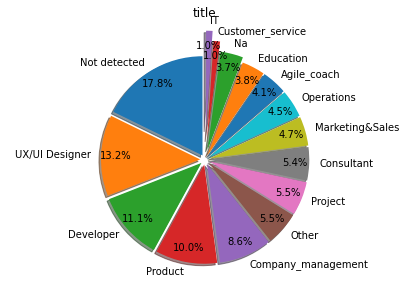

In [658]:
labels = ['Not detected', 'UX/UI Designer', 'Developer', 'Product','Company_management','Other','Project','Consultant','Marketing&Sales','Operations',\
          'Agile_coach','Education','Na','Customer_service','IT']
sizes = [288, 214,180,163,139,89,89,88,77,73,67,61,60,17,17]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.2, 0.3)
title = 'Percentage of roles within the users who gave feature feedback'
plot_pie_graph(labels, sizes, explode, "title")

In [380]:
df_ff['segment'].value_counts().to_frame()

,segment
SelfServe,743
Free,625
HighTouch,254


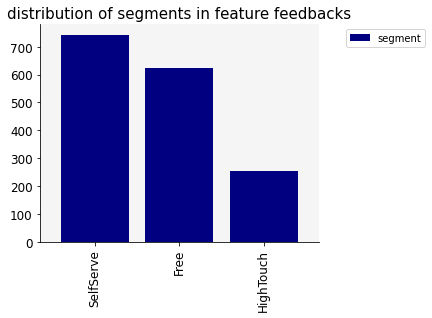

In [442]:
plot_bar_graph(df_ff['segment'], 'navy',"distribution of segments in feature feedbacks")

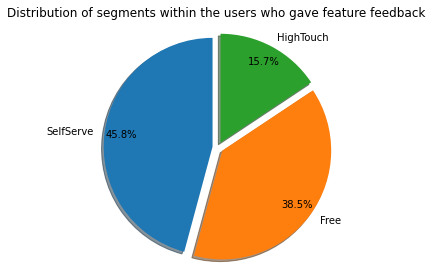

In [463]:
labels = ['SelfServe', 'Free', 'HighTouch']
sizes = [743, 625, 254]
explode = (0.05, 0.05, 0.05)
title = 'Percentage of segments within the users who gave feature feedback'

plot_pie_graph(labels, sizes, explode, title)

In [385]:
df_ff['FF_Score'].value_counts().to_frame()

,FF_Score
3,513
4,374
2,323
1,232
5,170
0,10


<a id='Question2'></a>
### Question 2: What is total average /median score of the feedback? What is the percentage of each score on the feedback? How many people like or dislike this feature? 

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [511]:
print('What is the average score in the feedback? {}'.format(statistics.mean(df_ff['FF_Score'])))
print('What is the median score in the feedback? {}'.format(statistics.median(df_ff['FF_Score'])))

What is the average score in the feedback? 2.936498150431566
What is the median score in the feedback? 3.0


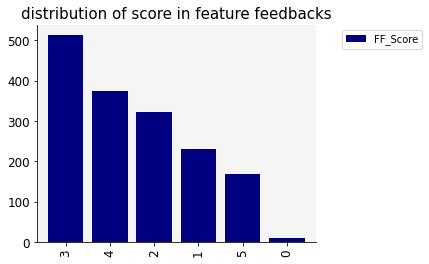

In [441]:
plot_bar_graph(df_ff['FF_Score'], 'navy',"distribution of score in feature feedbacks")

<a id='Question3'></a>

### Question 3: Who are the people most like the product? who are the people most dislike this product? 
<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [393]:
func_score = df_ff.groupby('FF_Score')['functional_role'].value_counts()
func_score = func_score.to_frame()
func_score = func_score.rename(columns={'functional_role':'count'})
func_score = func_score.reset_index(level=['FF_Score', 'functional_role']).sort_values(['FF_Score','count'],ascending = (True, False))

In [366]:
func_score[func_score['FF_Score'] == 0]

,FF_Score,functional_role,count
0,0,Company_management,2
1,0,UX/UI Designer,2
2,0,Agile_coach,1
3,0,Customer_service,1
4,0,Developer,1
5,0,Education,1
6,0,Marketing&Sales,1
7,0,Not detected,1


In [355]:
def plot_feedback_grid(df, score, color):
    ax = df[df['FF_Score'] == score].sort_values(['count']).plot(x='functional_role', y ='count', kind='barh',\
              figsize=(5,4), fontsize=12, width = 0.8, color = color, zorder=3)
    ax.set_title("Count of user roles by FF score " + str(score), fontdict={'fontsize': 15, 'fontweight': 'medium'})
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    ax.grid(color = 'w', zorder=0)

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_facecolor('whitesmoke')

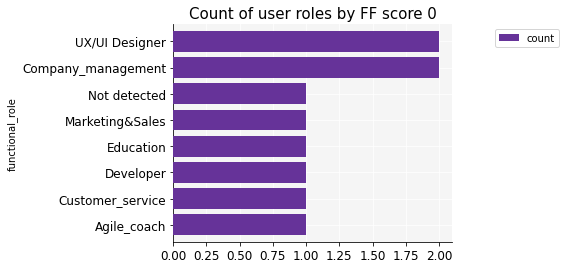

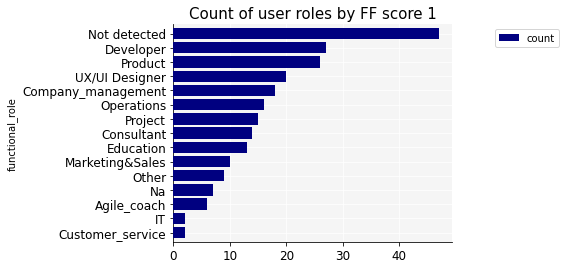

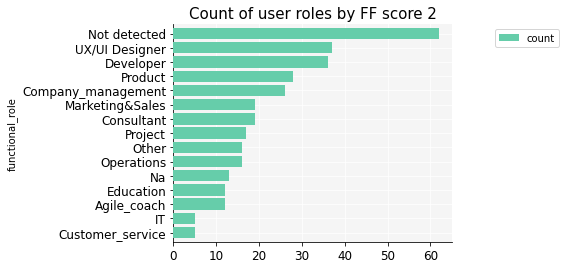

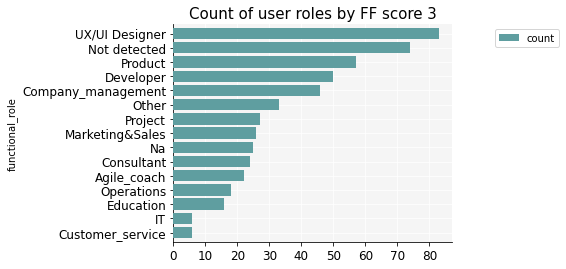

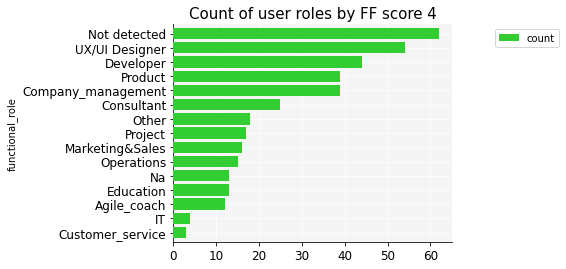

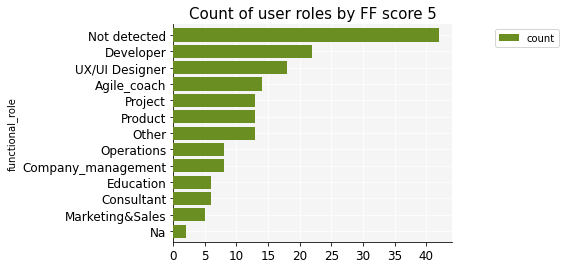

In [359]:
plot_feedback_grid(func_score, 0, 'rebeccapurple')
plot_feedback_grid(func_score, 1, 'navy')
plot_feedback_grid(func_score, 2, 'mediumaquamarine')
plot_feedback_grid(func_score, 3, 'cadetblue')
plot_feedback_grid(func_score, 4, 'limegreen')
plot_feedback_grid(func_score, 5, 'olivedrab')

In [346]:
seg_score = df_ff.groupby('FF_Score')['segment'].value_counts()
seg_score = seg_score.to_frame()
seg_score = seg_score.rename(columns={'segment':'count'})
seg_score = seg_score.reset_index(level=['FF_Score', 'segment']).sort_values(['FF_Score','count'],ascending = (True, False))

In [361]:
def plot_feedback_seg(df, score, color):
    ax = df[df['FF_Score'] == score].sort_values(['count']).plot(x='segment', y ='count', kind='barh',\
              figsize=(5,4), fontsize=12, width = 0.8, color = color, zorder=3)
    ax.set_title("Count of user roles by FF score " + str(score), fontdict={'fontsize': 15, 'fontweight': 'medium'})
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    ax.grid(color = 'w', zorder=0)

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_facecolor('whitesmoke')

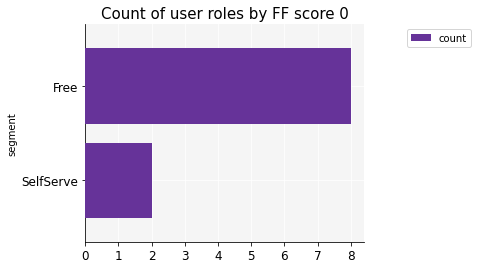

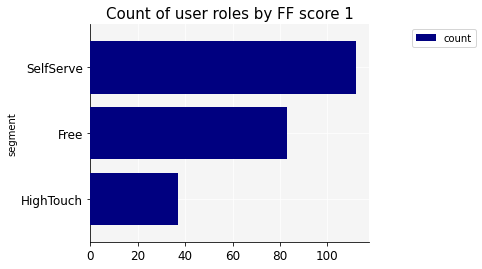

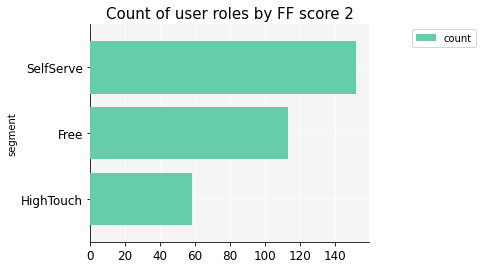

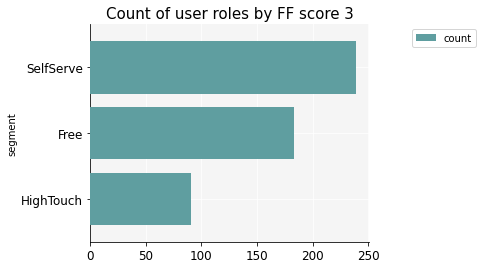

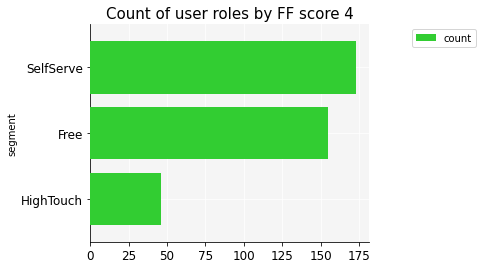

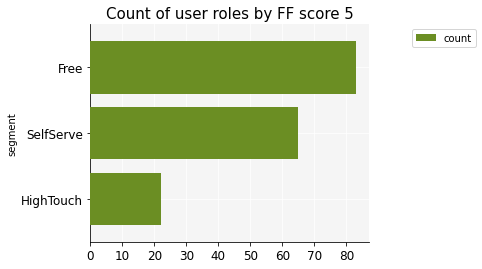

In [363]:
plot_feedback_seg(seg_score, 0, 'rebeccapurple')
plot_feedback_seg(seg_score, 1, 'navy')
plot_feedback_seg(seg_score, 2, 'mediumaquamarine')
plot_feedback_seg(seg_score, 3, 'cadetblue')
plot_feedback_seg(seg_score, 4, 'limegreen')
plot_feedback_seg(seg_score, 5, 'olivedrab')

<a id='Question4'></a>

### Question 4: What insights we can get from the feedback text from the users? What technique or methodology we can use to understand the feedback? 
<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [482]:
print('In feature feedback, we have in total {} text feedbacks'.format(len(df_ff)))

In feature feedback, we have in total 1622 text feedbacks


As we can see, we have 1622 feedbacks from users about Grids features. We need think about how can we efficiently use these text feedbacks, and how can we analyze them, finally have impactful insights to improve th products?

Here we are going to use some text analysis techniques, here are the steps:

**Text Processing**

- Clean data:
    - Remove accented words
    - Remove email address
    - Remove all the URLs
    - Remove numbers
    - Remove special characters
    - Remove English stop words: like the, a, an...
    - Lower case the words
    - (optional) Lemmatize the words

- Tokenize data:
    - Split the sentence in words and consider one word as one unit

**Text Analysis**
- NLP techniques (which we are going to apply in my analysis):
    - Words frequency
    - Collocation/words sequence: n-gram
    - Tf-idf
    - Sentiment analysis
    - Topic analysis
    


<a id='Question5'></a>

### Questions 5: What are the most frequent words appears on the 1-5 score feedback on Grids feature? Will these words give us insights?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [483]:
def tokenize(text):
    
    text = unidecode.unidecode(text)
    text = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', " ", text)
    text = ' '.join([item for item in text.split() if '@' not in item])
    text = re.sub(r'[0-9]', " ", text)
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    tokens=word_tokenize(text)
    stopwordsx = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    clean_tokens = []
    
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        if tok not in stopwordsx:
            clean_tokens.append(clean_tok)
        
    return clean_tokens

In [484]:
dropwords = ['kevin', "mccarthy","email", 'id']
def clean(text):
    
    text = unidecode.unidecode(text)
    text = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', " ", text)
    text = ' '.join([item for item in text.split() if '@' not in item])
    text = re.sub(r'[0-9]', " ", text)
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    for name in dropwords:
        text = text.replace(name, '')
    
    return text

In [485]:
ff['tokenized_text'] = ff['text_ff'].apply(tokenize)
ff['clean_text'] = ff['text_ff'].apply(clean)

In [486]:
ff.head()

,user_id,text_ff,FF_Score,tokenized_text,clean_text
0,3074457346778716098,can't search for templates and edit them easily. may be they should be available with boards,0,"[search, template, edit, easily, may, available, board]",can t search for templates and edit them easily may be they should be available with boards
1,3074457348316055325,where can i find the templates?,0,"[find, template]",where can i find the templates
2,3074457347365877915,template\n,0,[template],template
3,3074457347361058690,i'm searching for my template\n,0,"[searching, template]",i m searching for my template
4,3074457347703004632,"it is difficult to find new templates to add to my project. i specifically would like to create a flowchart, but the template does not appear for me to select, nor can i find a place to see all available templates.",0,"[difficult, find, new, template, add, project, specifically, would, like, create, flowchart, template, appear, select, find, place, see, available, template]",it is difficult to find new templates to add to my project i specifically would like to create a flowchart but the template does not appear for me to select nor can i find a place to see all available templates


## Most frequent words

In [491]:
single_count = pd.DataFrame()
for score in range(0, 6):
    score_series = ff[ff['FF_Score'] == score]['tokenized_text']
    counters = {}
    for row in score_series:
        for w in row:
            if w in counters:
                counters[w] += 1
            else:
                counters[w] = 1
    score_tmp = pd.DataFrame.from_records(list(counters.items()), columns=['word', 'count'])
    score_tmp = score_tmp.sort_values('count',ascending = False).head(15)

    score_tmp['score'] = score
    single_count = pd.concat((single_count, score_tmp))
single_count.head()

,word,count,score
1,template,11,0
7,find,6,0
6,board,3,0
0,search,2,0
23,found,2,0


In [499]:
def plot_graph(df, score, color):
    ax = df[df['score'] == score].sort_values(['count']).plot(x='word', y ='count', kind='barh',\
              figsize=(5,4), fontsize=12, width = 0.8, color = color, zorder=3)
    ax.set_title("15 Most frequent words in feature feedback score " + str(score), fontdict={'fontsize': 15, 'fontweight': 'medium'})
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    ax.grid(color = 'w', zorder=0)

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_facecolor('whitesmoke')

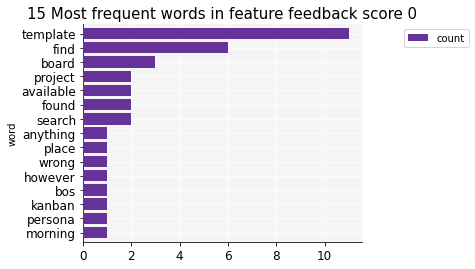

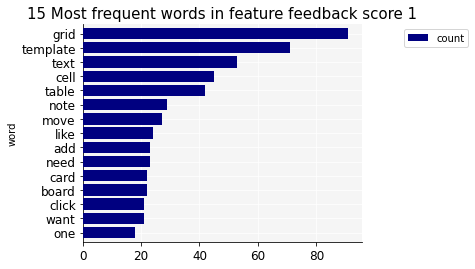

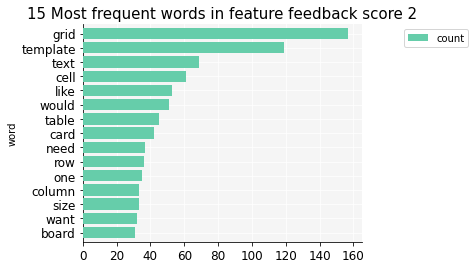

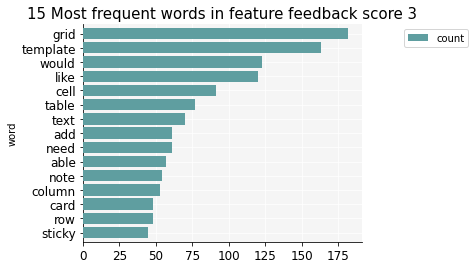

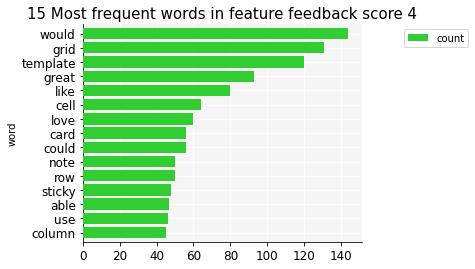

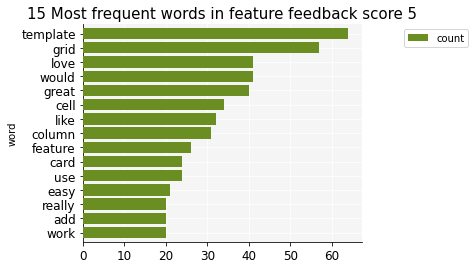

In [497]:
plot_graph(single_count, 0, 'rebeccapurple')
plot_graph(single_count, 1, 'navy')
plot_graph(single_count, 2, 'mediumaquamarine')
plot_graph(single_count, 3, 'cadetblue')
plot_graph(single_count, 4, 'limegreen')
plot_graph(single_count, 5, 'olivedrab')

### Most frequent words sequence, 2-grams and 3-grams

In [498]:
bigram_counts = pd.DataFrame()

for score in range(0, 6):
    score_series = ff[ff['FF_Score'] == score]['tokenized_text']
    counters = {}
    n = 2
    for row in score_series:
        bigrams = ngrams(row, n)
        for w in bigrams:
            w = ' '.join(w)
            if w in counters:
                counters[w] += 1
            else:
                counters[w] = 1
    score_tmp= pd.DataFrame.from_records(list(counters.items()), columns=['word', 'count'])
    score_tmp = score_tmp.sort_values('count', ascending = False).head(15)

    score_tmp['score'] = score
    bigram_counts = pd.concat((bigram_counts, score_tmp))

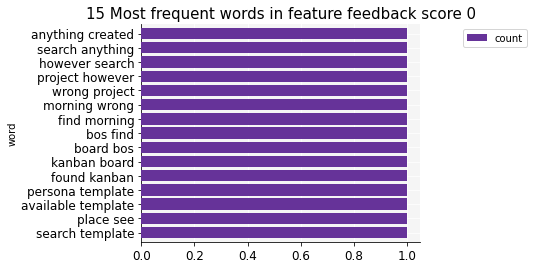

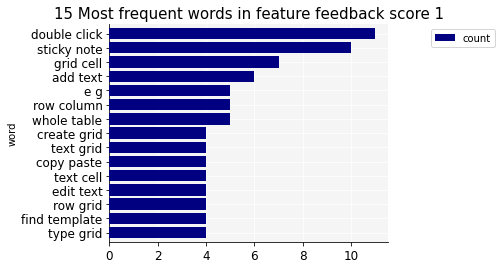

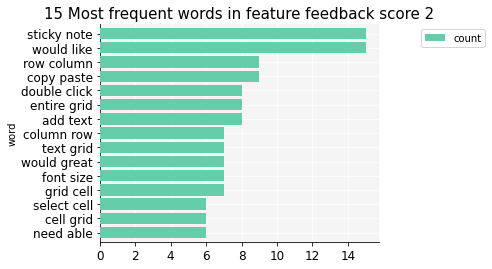

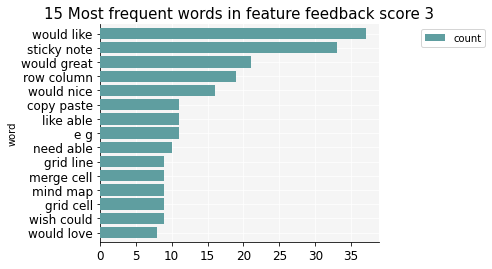

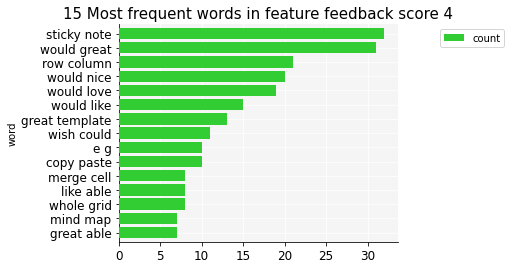

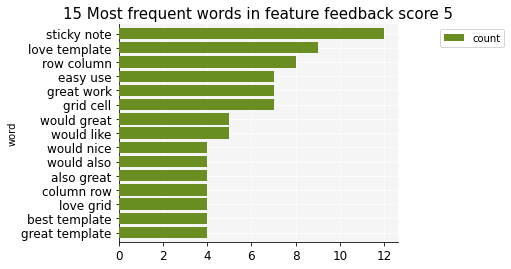

In [500]:
plot_graph(bigram_counts, 0, 'rebeccapurple')
plot_graph(bigram_counts, 1, 'navy')
plot_graph(bigram_counts, 2, 'mediumaquamarine')
plot_graph(bigram_counts, 3, 'cadetblue')
plot_graph(bigram_counts, 4, 'limegreen')
plot_graph(bigram_counts, 5, 'olivedrab')

In [501]:
trigram_counts = pd.DataFrame()

for score in range(0, 6):
    score_series = ff[ff['FF_Score'] == score]['tokenized_text']
    counters = {}
    n = 3
    for row in score_series:
        bigrams = ngrams(row, n)
        for w in bigrams:
            w = ' '.join(w)
            if w in counters:
                counters[w] += 1
            else:
                counters[w] = 1
    score_tmp= pd.DataFrame.from_records(list(counters.items()), columns=['word', 'count'])
    score_tmp = score_tmp.sort_values('count', ascending = False).head(10)

    score_tmp['score'] = score
    trigram_counts = pd.concat((trigram_counts, score_tmp))
    
trigram_counts.head()

C:\Users\saizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: generator 'ngrams' raised StopIteration
C:\Users\saizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: generator 'ngrams' raised StopIteration
C:\Users\saizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: generator 'ngrams' raised StopIteration
C:\Users\saizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: generator 'ngrams' raised StopIteration


,word,count,score
0,search template edit,1,0
19,find place see,1,0
21,see available template,1,0
22,found kanban board,1,0
23,kanban board bos,1,0


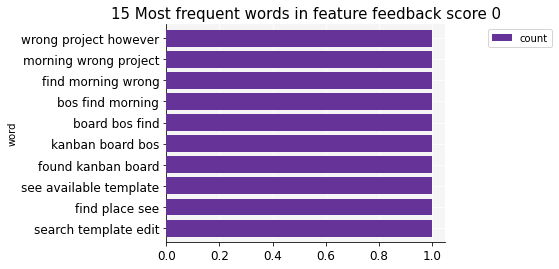

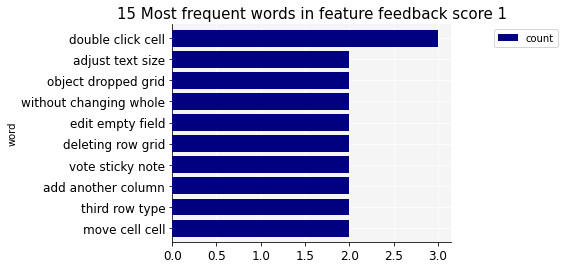

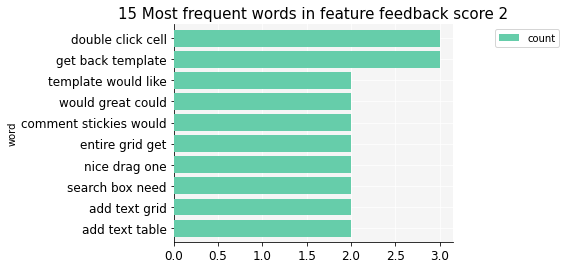

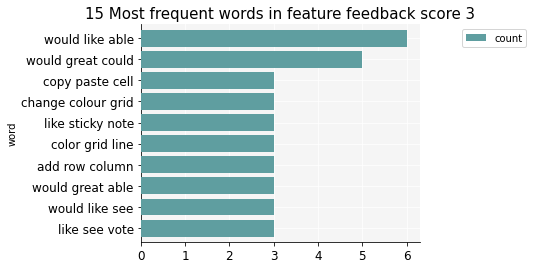

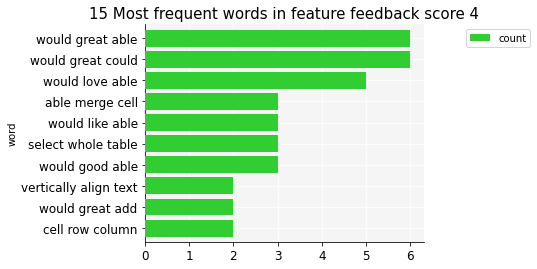

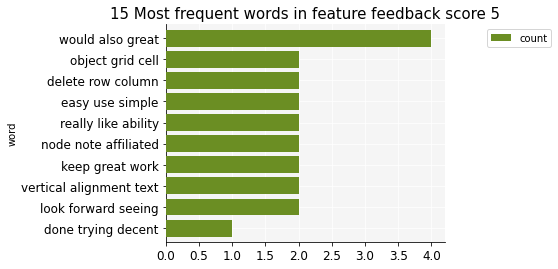

In [502]:
plot_graph(trigram_counts, 0, 'rebeccapurple')
plot_graph(trigram_counts, 1, 'navy')
plot_graph(trigram_counts, 2, 'mediumaquamarine')
plot_graph(trigram_counts, 3, 'cadetblue')
plot_graph(trigram_counts, 4, 'limegreen')
plot_graph(trigram_counts, 5, 'olivedrab')

In [671]:
ff[ff['text_ff'].str.contains('templates')].drop_duplicates('user_id').head(10)

,user_id,text_ff,FF_Score,tokenized_text,clean_text
0,3074457346778716098,can't search for templates and edit them easily. may be they should be available with boards,0,"[search, template, edit, easily, may, available, board]",can t search for templates and edit them easily may be they should be available with boards
1,3074457348316055325,where can i find the templates?,0,"[find, template]",where can i find the templates
4,3074457347703004632,"it is difficult to find new templates to add to my project. i specifically would like to create a flowchart, but the template does not appear for me to select, nor can i find a place to see all available templates.",0,"[difficult, find, new, template, add, project, specifically, would, like, create, flowchart, template, appear, select, find, place, see, available, template]",it is difficult to find new templates to add to my project i specifically would like to create a flowchart but the template does not appear for me to select nor can i find a place to see all available templates
5,3074457347639000286,templates,0,[template],templates
15,3074457347971568087,how do i go back to the list of templates once ive chosen a note\nhow do i delete a note,1,"[go, back, list, template, ive, chosen, note, delete, note]",how do i go back to the list of templates once ive chosen a note how do i delete a note
27,3074457345835130452,not enough templates,1,"[enough, template]",not enough templates
39,3074457346789386722,"it doesn't show me any templates, it´s all blank",1,"[show, template, blank]",it doesn t show me any templates it s all blank
40,3074457346988040181,"this is in response to your ui of giving feedback, not the templates. i kept clicking ""give feedback"" and nothing was showing up for a response box. finally i thought to scroll down and finally saw the prompt at the very bottom of my page after scrolling down. this modal should display right beside or below the button prompt to give feedback, not in a completely different visual context.... and now i'm clicking ""send"" and having to click multiple times... why isn't it sending on first click?",1,"[response, ui, giving, feedback, template, kept, clicking, give, feedback, nothing, showing, response, box, finally, thought, scroll, finally, saw, prompt, bottom, page, scrolling, modal, display, right, beside, button, prompt, give, feedback, completely, different, visual, context, clicking, send, click, multiple, time, sending, first, click]",this is in response to your ui of giving feedback not the templates i kept clicking give feedback and nothing was showing up for a response box finally i thought to scroll down and finally saw the prompt at the very bottom of my page after scrolling down this modal should display right bese or below the button prompt to give feedback not in a completely different visual context and now i m clicking send and having to click multiple times why isn t it sending on first click
57,3074457347312257811,i can't see any templates,1,"[see, template]",i can t see any templates
67,3074457347499545501,"""something went wrong"" impossible to access the templates.",1,"[something, went, wrong, impossible, access, template]",something went wrong impossible to access the templates


In [672]:
ff[ff['text_ff'].str.contains('grids')].drop_duplicates('user_id').head(10)

,user_id,text_ff,FF_Score,tokenized_text,clean_text
62,3074457345841523028,can't put grids in grids and no way to flatten a grid to a static shape to circumvent that restriction,1,"[put, grid, grid, way, flatten, grid, static, shape, circumvent, restriction]",can t put grs in grs and no way to flatten a gr to a static shape to circumvent that restriction
98,3074457346413468617,there is a major issue with grids right now. anytime i enter text into a cell it automatically gets deleted. \nanytime i try to move or resize some images inside a grid it reverts back to its original position / size.,1,"[major, issue, grid, right, anytime, enter, text, cell, automatically, get, deleted, anytime, try, move, resize, image, inside, grid, reverts, back, original, position, size]",there is a major issue with grs right now anytime i enter text into a cell it automatically gets deleted anytime i try to move or resize some images inse a gr it reverts back to its original position size
106,3074457347532840540,i can't create grids...why...,1,"[create, grid]",i can t create grs why
110,3074457346790848301,"i cannot create my grids, i can only borrow",1,"[create, grid, borrow]",i cannot create my grs i can only borrow
113,3074457346046277799,"we should be able to group grids, frames and shapes too...",1,"[able, group, grid, frame, shape]",we should be able to group grs frames and shapes too
117,3074457346632856530,hard to adjust. using grids and cards is much easier,1,"[hard, adjust, using, grid, card, much, easier]",hard to adjust using grs and cards is much easier
124,3074457347393843592,please fix grids \ncannot handle frustration of not being able to edit empty fields,1,"[please, fix, grid, handle, frustration, able, edit, empty, field]",please fix grs cannot handle frustration of not being able to edit empty fields
139,3074457345737425612,"hi, i love grids, but somehow i'm no longer able to type right into a cell. neither in the mac app, nor on ipad",1,"[hi, love, grid, somehow, longer, able, type, right, cell, neither, mac, app, ipad]",hi i love grs but somehow i m no longer able to type right into a cell neither in the mac app nor on ipad
144,3074457347249040903,my grids keep magically linking to random elements nearby and moving them around or deleting them along with stuff in the grid,1,"[grid, keep, magically, linking, random, element, nearby, moving, around, deleting, along, stuff, grid]",my grs keep magically linking to random elements nearby and moving them around or deleting them along with stuff in the gr
157,3074457347243745308,double clicking all over the grid and still cannot edit a cell or type anything in an empty cell - love miro - hate grids,1,"[double, clicking, grid, still, edit, cell, type, anything, empty, cell, love, miro, hate, grid]",double clicking all over the gr and still cannot edit a cell or type anything in an empty cell love miro hate grs


### Insights
    Templates (cannot find templates, difficult to find template) (improve template icon?)
    problem with double click, sticky note, add text (cannot)
    cannot create grid in chrome,
    cannot select cell and add text in app
    notes in sticky notes or sticky notes is not easy to use?
    find template(cannot), not enought template?
    copy paste problem?
    cannot select only one cell
    cannot copy and paste the same font or format
    problem with cards (cannot see votes and ranking on the cards) 
    problem with editing the text
    limit of row
    cannot save
    cannot put grids in grids
    difficult to move the table
    timeline template needed

<a id='Question6'></a>

### Question 6: What are the most relevant keywords appears on the 1-5 score feedback on Grids feature? Will these words give us insights?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [521]:
ff[ff['FF_Score'] == 1][['clean_text']].head()

,clean_text
10,on chrome couldn t create the gr on the app couldn t select a single cell to add text in it
11,can t figure out how to change border settings don t understand how objects dropped into a gr relate to a gr can t figure out how to select and reposition objects dropped into a gr
12,the text keeps disappearing from the table cell after i type it and click away
13,been working on a sticky for over an hour
14,where do you type on the sticky


In [546]:
def plot_tfidf(df_d, score, color):
    
    score1_Tfidf=df_d[df_d['FF_Score'] == score][['clean_text']]

    tfIdfVectorizer=TfidfVectorizer(use_idf=True, stop_words='english')
    tfIdf = tfIdfVectorizer.fit_transform(score1_Tfidf['clean_text'])
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF')
    df.reset_index(inplace = True)
    df = df.rename(columns = {'index': 'word'})
    Tfidf_score1_bi = df.tail(15)

   # print(Tfidf_score1_bi.sort_values('TF-IDF', ascending = False))

    ax = Tfidf_score1_bi.plot(x='word', y='TF-IDF',kind='barh', \
                  figsize=(5,4), fontsize=12, width =0.8, color = color)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
    ax.set_title("15 Most relevant words in feature feedback score " + str(score), fontdict={'fontsize': 15, 'fontweight': 'medium'})

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

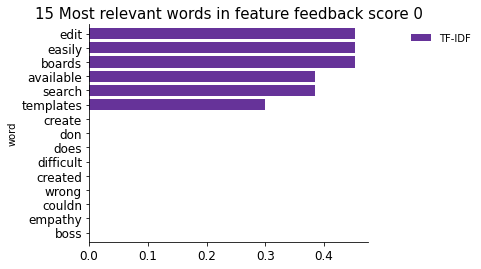

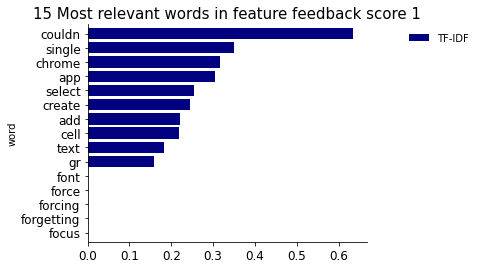

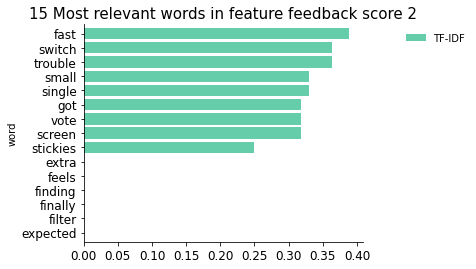

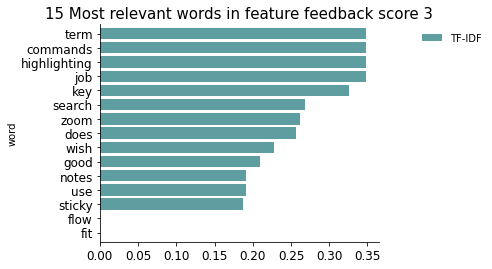

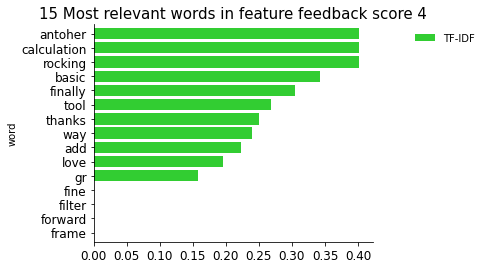

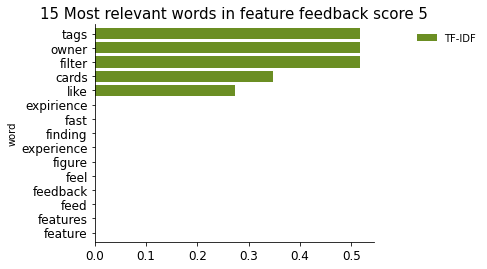

In [547]:
plot_tfidf(ff, 0, 'rebeccapurple')
plot_tfidf(ff, 1, 'navy')
plot_tfidf(ff, 2, 'mediumaquamarine')
plot_tfidf(ff, 3, 'cadetblue')
plot_tfidf(ff, 4, 'limegreen')
plot_tfidf(ff, 5, 'olivedrab')

In [549]:
def plot_tfidf_bi(df_d, score, color):
    
    score1_Tfidf=df_d[df_d['FF_Score'] == score][['clean_text']]

    tfIdfVectorizer=TfidfVectorizer(use_idf=True, stop_words='english',ngram_range=(2,2))
    tfIdf = tfIdfVectorizer.fit_transform(score1_Tfidf['clean_text'])
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF')
    df.reset_index(inplace = True)
    df = df.rename(columns = {'index': 'word'})
    Tfidf_score1_bi = df.tail(15)

    #print(Tfidf_score1_bi.sort_values('TF-IDF', ascending = False))

    ax = Tfidf_score1_bi.plot(x='word', y='TF-IDF',kind='barh', \
                  figsize=(5,4), fontsize=12, width =0.8, color = color)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
    ax.set_title("15 Most relevant words in feature feedback score " + str(score), fontdict={'fontsize': 15, 'fontweight': 'medium'})

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

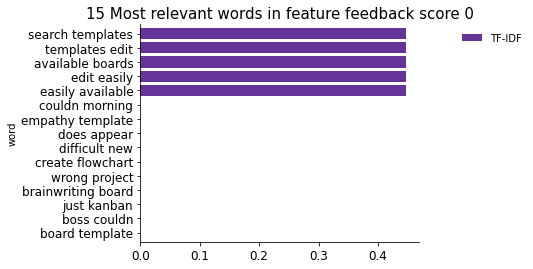

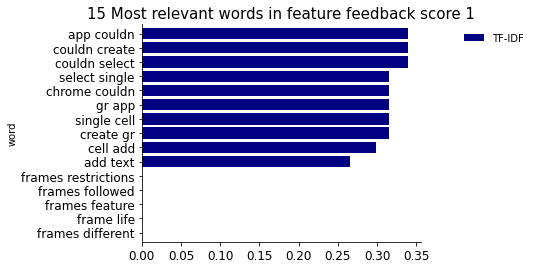

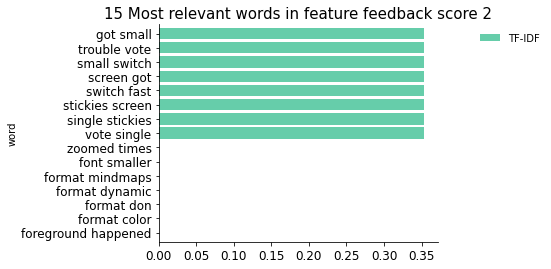

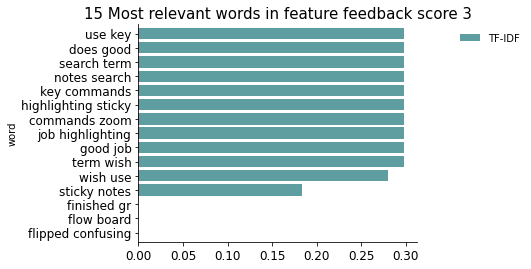

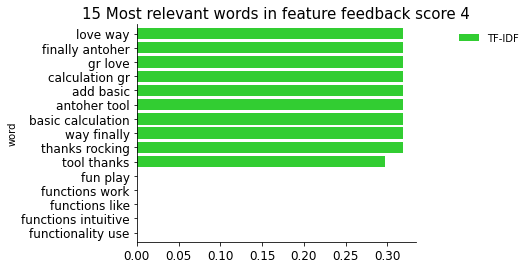

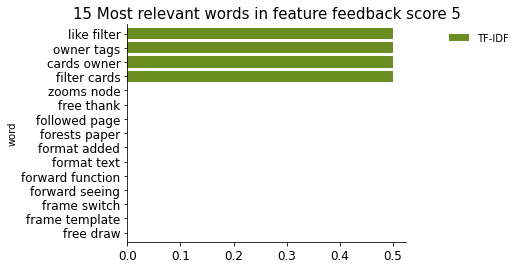

In [550]:
plot_tfidf_bi(ff, 0, 'rebeccapurple')
plot_tfidf_bi(ff, 1, 'navy')
plot_tfidf_bi(ff, 2, 'mediumaquamarine')
plot_tfidf_bi(ff, 3, 'cadetblue')
plot_tfidf_bi(ff, 4, 'limegreen')
plot_tfidf_bi(ff, 5, 'olivedrab')

In [551]:
def plot_tfidf_tri(df_d, score, color):
    
    score1_Tfidf=df_d[df_d['FF_Score'] == score][['clean_text']]

    tfIdfVectorizer=TfidfVectorizer(use_idf=True, stop_words='english',ngram_range=(3,3))
    tfIdf = tfIdfVectorizer.fit_transform(score1_Tfidf['clean_text'])
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF')
    df.reset_index(inplace = True)
    df = df.rename(columns = {'index': 'word'})
    Tfidf_score1_bi = df.tail(15)

    #print(Tfidf_score1_bi.sort_values('TF-IDF', ascending = False))

    ax = Tfidf_score1_bi.plot(x='word', y='TF-IDF',kind='barh', \
                  figsize=(5,4), fontsize=12, width =0.8, color = color)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
    ax.set_title("15 Most relevant words in feature feedback score " + str(score), fontdict={'fontsize': 15, 'fontweight': 'medium'})

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

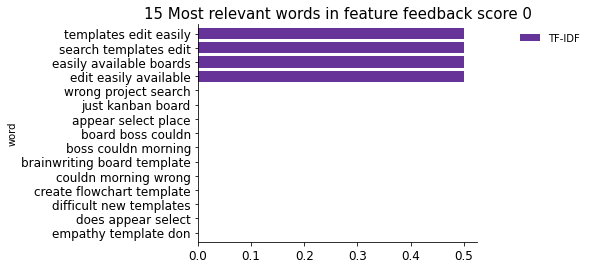

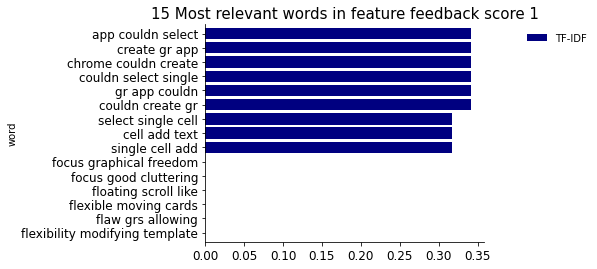

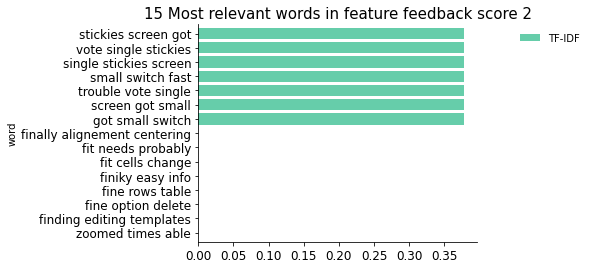

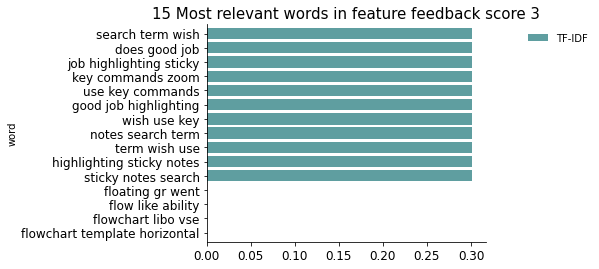

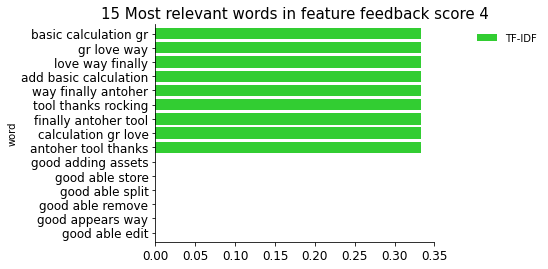

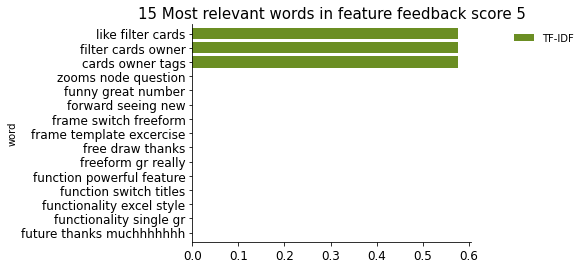

In [552]:
plot_tfidf_tri(ff, 0, 'rebeccapurple')
plot_tfidf_tri(ff, 1, 'navy')
plot_tfidf_tri(ff, 2, 'mediumaquamarine')
plot_tfidf_tri(ff, 3, 'cadetblue')
plot_tfidf_tri(ff, 4, 'limegreen')
plot_tfidf_tri(ff, 5, 'olivedrab')

In [554]:
def plot_tfidf_4(df_d, score, color):
    
    score1_Tfidf=df_d[df_d['FF_Score'] == score][['clean_text']]

    tfIdfVectorizer=TfidfVectorizer(use_idf=True, stop_words='english',ngram_range=(4,4))
    tfIdf = tfIdfVectorizer.fit_transform(score1_Tfidf['clean_text'])
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF')
    df.reset_index(inplace = True)
    df = df.rename(columns = {'index': 'word'})
    Tfidf_score1_bi = df.tail(15)

    #print(Tfidf_score1_bi.sort_values('TF-IDF', ascending = False))

    ax = Tfidf_score1_bi.plot(x='word', y='TF-IDF',kind='barh', \
                  figsize=(5,4), fontsize=12, width =0.8, color = color)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
    ax.set_title("15 Most relevant words in feature feedback score " + str(score), fontdict={'fontsize': 15, 'fontweight': 'medium'})

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

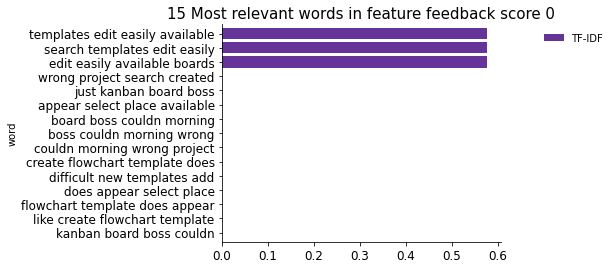

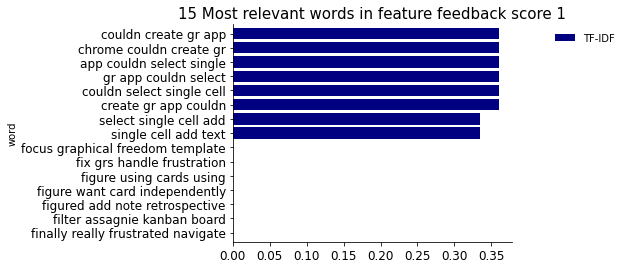

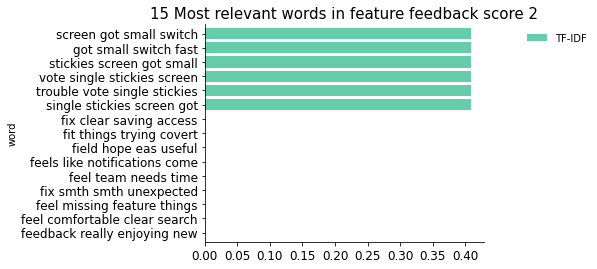

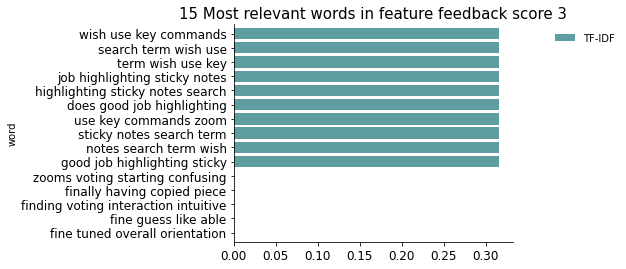

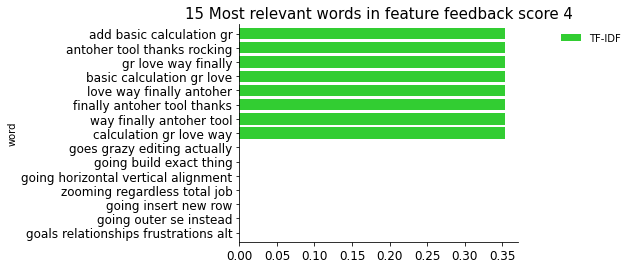

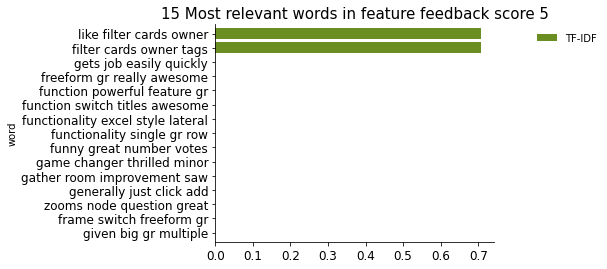

In [555]:
plot_tfidf_4(ff, 0, 'rebeccapurple')
plot_tfidf_4(ff, 1, 'navy')
plot_tfidf_4(ff, 2, 'mediumaquamarine')
plot_tfidf_4(ff, 3, 'cadetblue')
plot_tfidf_4(ff, 4, 'limegreen')
plot_tfidf_4(ff, 5, 'olivedrab')

## Insights:

score 1:
<br>
chrome could not create grid
<br>
could not select single cell
<br>
frame restrictions
<br>
app could not create grid
<br>
frustrating navigating (the menu)
<br>

score 2:
<br>
not fast
<br>
screen got too small
<br>
cannot see the votes on sticky notes
<br>
vote function problem


Score 3:
<br>
sticky notes uses search term
<br>
highlighting does good job
<br>
finding voting interation difficult
<br>
zooms voting is confusing

score 4:
<br>
want to add basic calculation in grids


score 5:
<br>
able to filter cards owners

<a id='Question7'></a>

### Question 7: The people who liked or disliked this product also gave opinion in NPS survey? 

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [447]:
def NPS(score):
    if 0<= score <= 6:
        return 'detractor'
    elif 6 < score <= 8:
        return 'passive'
    else:
        return 'promotor'

In [448]:
nps['NPS_type'] = nps['NPS_Score'].apply(NPS)
nps.head()

,user_id,text_nps,NPS_Score,NPS_type
0,3074457347487777543,Wireframe and wireframe 'templates' are impossible to find/ come by and nothing is free.\n,0,detractor
1,3074457346925614583,Connection is extremely unstable and slow,0,detractor
2,3074457347797810818,loading time is so long\nsometimes i cant get into the board and im felling unstable to use in business,2,detractor
3,3074457347345528768,I needed a mindmap and although it is possible to create a mindmap with miro it is not easy. It is also very annoying when trying to edit the mindmap.,2,detractor
4,3074457346096702382,Wonky interface / interaction with shapes and stickies. Lack of ability to align shapes easily.,3,detractor


In [449]:
df_ff_nps = nps.merge(df_ff, on='user_id', how = 'inner')
print('the number of users who appeared in both feature feedback and NPS survey: {}'.format(len(df_ff_nps)))

the number of users who appeared in both feature feedback and NPS survey: 32


<a id='Question8'></a>

### Question 8. What was the score the people who sent feature feedback gave on NPS?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [616]:
df_ff_nps[['user_id','NPS_Score','FF_Score']].sort_values('FF_Score')

,user_id,NPS_Score,FF_Score
0,3074457347261395615,8,2
30,3074457347142388162,10,2
14,3074457347325418866,10,2
12,3074457347148789694,10,2
15,3074457346629589540,10,2
31,3074457347636418723,10,2
29,3074457347085026042,10,3
28,3074457347085026042,10,3
27,3074457347064394095,10,3
23,3074457347067672777,10,3


<a id='Question9'></a>

### Question 9. Do these people possibly increase or decrease their NPS score based on the experienced with Grids feature?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

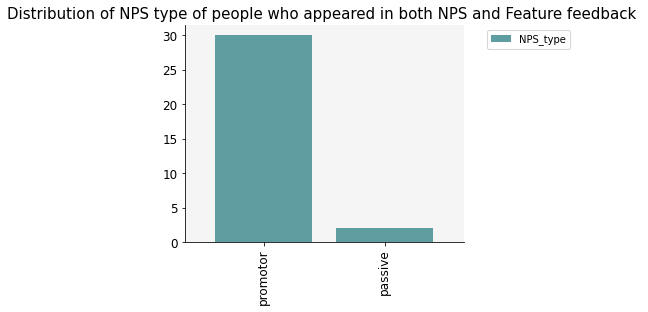

In [460]:
plot_bar_graph(df_ff_nps['NPS_type'], 'cadetblue', 'Distribution of NPS type of people who appeared in both NPS and Feature feedback ')

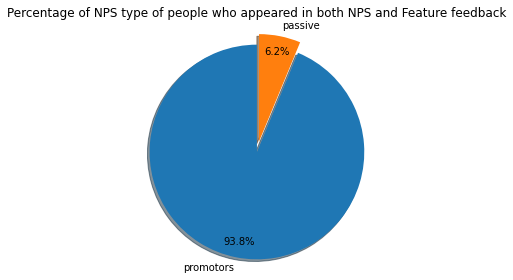

In [464]:
labels = ['promotors', 'passive']
sizes = [30,2]
explode = [0.05, 0.05]
title = 'Percentage of NPS type of people who appeared in both NPS and Feature feedback'
plot_pie_graph(labels, sizes, explode, title)

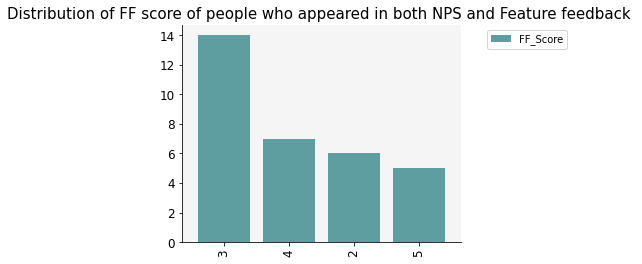

In [465]:
plot_bar_graph(df_ff_nps['FF_Score'], 'cadetblue', 'Distribution of FF score of people who appeared in both NPS and Feature feedback ')

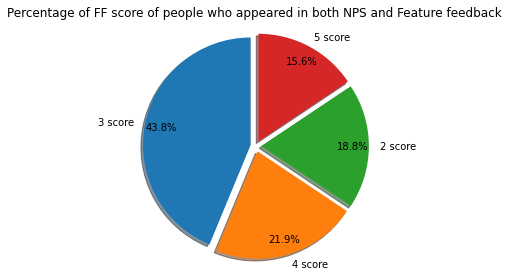

In [467]:
labels = ['3 score', '4 score', '2 score', '5 score']
sizes = [14, 7, 6, 5]
explode = [0.05, 0.05, 0.05, 0.05]
title = 'Percentage of FF score of people who appeared in both NPS and Feature feedback'
plot_pie_graph(labels, sizes, explode, title)

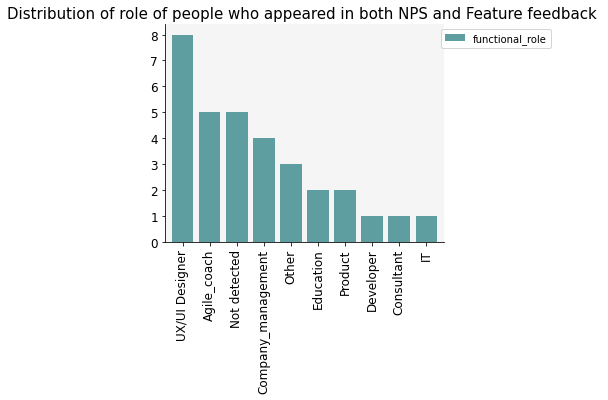

In [476]:
plot_bar_graph(df_ff_nps['functional_role'], 'cadetblue', 'Distribution of role of people who appeared in both NPS and Feature feedback ')

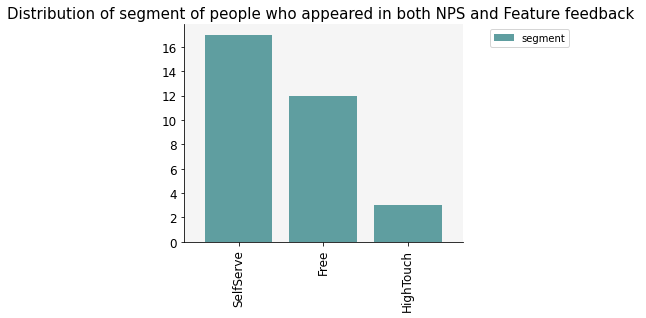

In [477]:
plot_bar_graph(df_ff_nps['segment'], 'cadetblue', 'Distribution of segment of people who appeared in both NPS and Feature feedback ')


<a id='Question10'></a>

### Question 10: What insights we can get from the feedback text from the users? What technique or methodology we can use to understand the feedback?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

#### Let's look at the text from the promotors who gave 2 scores in feature feedbacks

In [480]:
df_ff_nps[df_ff_nps['FF_Score'] == 2][['text_ff','functional_role']]

,text_ff,functional_role
0,i am using it as a base template to do other things. it was just the first that i picked,Developer
12,participant list too narrow in the template,UX/UI Designer
14,"i love the grids :-) excellent user experience. but sometimes i can't minimize the row size. it keeps the size as if there were 2 lines of text when in fact i just have 1, even when i try to manually make it smaller. i check if there is perhaps a ""space"" creating that second line of text but there is none.",Other
15,its super hard to grab and move a table in a quick motion. what do i click on to get the move option?,Company_management
30,"looks like i coud typ text ine grid (font selection, text size etc.), but nothing is happening",UX/UI Designer
31,"on the preview it show us a row for the month, day of the week, also rows to add the task and when adding the template it is not the same, or what i was expecting.",Agile_coach


#### Insights:
    participant list too narrow 
    cannot minimize the row size, it keep size as min 2 lines
    hard to grab and move table, not quick enough
    cannot text in grid
    the preview is different from template

### Let's look at the text from the promotors who gave 3 scores in feature feedbacks

In [560]:
df_ff_nps[df_ff_nps['FF_Score'] == 3][['text_ff','functional_role']]

,text_ff,functional_role
2,"very handy to not copy paste lots of stickies, but it's not revolutionary ;)",Consultant
3,don't see the found card immediately,IT
5,"i liked the previous mind map interface better. and i would like to start with just the first/middle one, so that i don't have to delete limbs every time i start an empty template",UX/UI Designer
6,it would be really helpful to get more guides on how to edit this template. how to start a new arrow and block. on some templates you already got this.,UX/UI Designer
8,can we have a release roadmap template?,Product
10,hard to select the whole table\n\nsometimes hard to write into cells\n\nwhy does cell size not work automatically,Not detected
13,i love it! but (1) i need to be able to bulk resize columns to the same width e.g. highlight them all and resize one resizes all (2) it's actually not possible for me to copy paste a table i made without the grid into this. it takes so many clicks to get the text inside the cell in a way that isn't just pasting a text box in the cell as an 'item' if that makes sense.,UX/UI Designer
16,"copy and paste all contents from one cell to another cell is a must have. select cell (blue outline, darker grey interior) press ctrl/cmd + c, select other cell (new cell blue outline, darker grey interior) press ctrl/cmd + v and voila -- all contents cut and pasted. this is how all other grid tools work (gsheet/excel). \n\nvertical centering within a cell would be a very nice to have. \n\ncell boundary line coloring ... a kinda nice to have.",Company_management
19,"the notes are fine i guess, but i would like to be able to use the pseudo markdown like syntax in cards. can i do that?",Not detected
22,some stickies had writing in them already. i created my own template of a grid of single-coloured stickies - both square and rectangular.,Agile_coach


#### Insights:
    cannot see found card immediately
    prefer the mind map more, want a simple table to avoid deleting lines
    want more guidance to edit the template, how to start new arrow and block
    want roadmap template
    hard to select whole table, cell size does not work well
    cannot resize all columns like excel
    cannot insert grids in grids
    cannot copy and paste the same format into another cell
    export to csv option with error, cannot generate well the text
    like more kanban board
    Add pseudo markdown option in cards (make summary, font, size...)

### Let's look at the text from the promotors who gave 4 scores in feature feedbacks

In [559]:
df_ff_nps[df_ff_nps['FF_Score'] == 4][['text_ff','functional_role']]

,text_ff,functional_role
1,"i like it - but it needs the ability to collapse nodes. :)\n\nand you know what else would be great? the ability to create a dynalist.io type of list.\nso much of miro is about clarifying and organizing next steps. that would help.\neven more amazing - would be if one box or sticky note could appear in more than one chart. so an idea on a mindmap, could also be a card on a kanban or an item on a to-do list.\nand bec it is the very same info, when edited on one, it is edited everywhere. \nthis would of course be an option - a kind of supercard or something.\nthat way you can edit where you are organizing your ideas and it is also edited where you are organizing the tasks, if not in the same place.",Company_management
9,can we please add the opportunity canvas to the templates please?,Product
17,"this is awesome... great work everyone! \ni love the diagram contents in a grid... can't wait to have access to this via the sdk.. ;)\n\nimprovement:\nthe 'select edge of grid' in order to 'resize/scale the whole grid' is pretty intuitive... its echos the google apps / power point sort of ui (which is ok, but i dont love --> #miroforever). \n\nat the point of a full grid selected state (lasso select all of grid and content- full grid and content selected with blue outline): add a corner or edge pull for either one or both dimension resize/scale. i think at this point the selection of the inner content of the cells would be deselected -- the logic being that we've transitioned to editing the grid... \n\nthere's currently little else available to us to do with a whole grid and contents selection. plugins work. we might as well have the resize/scale available to us. \n\n----\n\n\ni may have missed it in the tutorial.. but i'm not entirely sure what ""cell resize: auto | manual"" does... maybe leave a small '?' icon near this item during beta? \n\n--\n\ngreat work. . . can't wait to put this to use.",Company_management
18,much easier than laying shapes out in a grid!,UX/UI Designer
24,wasn't obvious to others on board that there is a video chat they could join. i ended up putting yellow sticky in the board that said they could click the join button to enter the chat.,Agile_coach
25,"great to finally have a workable ""tables"" app in miro!! wish list: aligning items even across cells (eg left-align all stickies highlighted even if are in a different cell within the grid).",Agile_coach
26,had some trouble to figure out how to move a grid. i ended up resizing it instead. had expected the move option in the grid's menu as well.,UX/UI Designer


#### Insights:
    create a dynalist.io type of list
    one box or sticky note could appear in more than one chart
    when change/edit one place it can reflect in everywhere
    add a corner or edge pull for either one or both dimension resize/scale
    leave a small '?' icon if someone needs help
    wasn't obvious to others on board that there is a video chat they could join
    aligning items even across cells
    wish move option in the grid's menu

<a id='Question11'></a>

### Question 11: How many NPS feedback are related to grids feature?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

#### Let's look at the text from the promotors who gave 2 scores in feature feedbacks

In [566]:
nps_grids = nps[nps['text_nps'].str.contains('grids')].drop_duplicates('user_id')
print('{} NPS feedback are related to grids feature'.format(len(nps_grids)))

8 NPS feedback are related to grids feature


<a id='Question12'></a>

### Question 12: Are the people who gave grid feature related NPS feedbacks promotors? passive? or detractor?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [568]:
nps_grids['NPS_type'].value_counts().to_frame()

,NPS_type
promotor,7
passive,1


<a id='Question13'></a>

### Question 13: What we can learn from these feedbacks? What technique or methodology we can use to understand the feedback?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [569]:
nps_grids

,user_id,text_nps,NPS_Score,NPS_type
49,3074457346995478538,"Feature: I wish there was a way to automatically make grids/tables that we can adjust rows/columns (like an excel spreadsheet). My team tends to create grid-like frames to with certain headers/topics (e.g. row names) against people's opinions (e.g. columns with people's names). I would want the rows/columns to be adjustable so we can dynamically place number of text/stickies in the ""table cells."" Tables are sometimes still the best way to organize thoughts/work. But we love using Miro's sticky feature with it.",7,passive
167,3074457346724164370,"Command for auto order object in grids, as exists in Figma.",9,promotor
254,3074457347363859643,"some small improvments on the grids : merging, simple calculations?. \ni am a designer, so improved drawings tools : the same one + another to color in ""multiply"" mode.\nabove all : keep the interface as sleek, intuive, simple as possible. each added functions must improve, and not decrease the overall experience !\n",10,promotor
265,3074457345766056704,custom grids for presentations,10,promotor
337,3074457347838285792,"I am already pushing Miro company wide.\nThings to do better:\nA little better grids (the grid lines can not be configured)\nPlanning Poker as default app - I dont have the time to explain ~20 people (2 teams) how to verify the app.\nMore more more templates, especially more ""small"" templates, I am also working on this ;).\nVoting: Give the option to vote every X just once.\nActivity board should contain seconds.\nI did not try the Zapir Apps yet, so maybe i exists already - I would love to have some simple way of spreadsheeting and visualization of for example surveys in miro.\nGrouping and locking is super cool, but sometimes also super confusing. Beeing new at Miro I often do not understand what I am ungrouping / unlocking.\n\nBut really, guys, keep it up! Miro is so cool, I am recommending it all the time. I also love how lean it is. Dont build it to complicated ;)",10,promotor
375,3074457346037971174,"Some improvements on the new grid feature: vertical alignment, groups inside cells, padding, cell spacing. Allow SVG files to be inserted and custom filled.resized.....add card features to stickies and allow card visual customizations. Improve voting feature to allow dot voting, with layers that could be hidden/shown. Better boards organization features (folders of projects and folders inside projects). Add LOE (maybe even integration with Jira) and allow sum (maybe on grids). I know that some of these wishes may be out of what you planned for Miro, but it has the potential to be the #1 tool for remote WORK, not only collaboration. Extend the features and the plugin API to make these possibilities endless.",10,promotor
409,3074457346937978373,grids for alignment; font flexibility with post-its (bold); library of icons would be awesome,10,promotor
413,3074457347142388162,"Fix lag issues with the new grids. Sometimes it is really slow to edit a text, but everything else is working fast as usual.",10,promotor


### Insights
    wish can automatically make grids/tables like excel
    want the rows/columns to be adjustable
    auto order object in grids
    can be able to merge the grids
    be able to simple calculation.
    More templates, specially small templates.
    give option to vote every thing just once
    activity board should contain seconds
    allow SVG files to be inserted
    vertical alignment, groups inside cells, padding, cell spacing
    add card features to stickies
    add LOE (level of effort)
    library of icons(explains what does each icon means
    slow to edit a text (lag issue)

<a id='Question14'></a>

### Question 14: Are there tickets talking/complaining about grids feature? how many are?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [571]:
grids_ticket = ticket[ticket['text_ticket'].str.contains('grids')]
print('{} tickets are talking about grids'.format(len(grids_ticket)))

46 tickets are talking about grids


<a id='Question15'></a>

### Question 15: How can we understand the sentiment that these tickets gave to use? Negative? Positive or Neutral? 

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [572]:
grids_ticket['clean_ticket_text'] = grids_ticket['text_ticket'].apply(clean)

C:\Users\saizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [573]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [574]:
grids_ticket['sentiment'] = grids_ticket['clean_ticket_text'].apply(nltk_sentiment)
grids_ticket['sentiment_neg'] = grids_ticket['sentiment'].apply(lambda x: x['neg'])
grids_ticket['sentiment_neu'] = grids_ticket['sentiment'].apply(lambda x: x['neu'])
grids_ticket['sentiment_pos'] = grids_ticket['sentiment'].apply(lambda x: x['pos'])
grids_ticket['sentiment_compound'] = grids_ticket['sentiment'].apply(lambda x: x['compound'])
grids_ticket = grids_ticket.drop('sentiment', axis=1)

C:\Users\saizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\saizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\saizh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

#### The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

### positive sentiment : (compound score >= 0.05)
### neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
### negative sentiment : (compound score <= -0.05)

In [575]:
def sentiment(score):
    if score >= 0.05:
        return 'positive'
    if score <= -0.05:
        return 'negative'
    return 'neutral'

In [576]:
grids_ticket['sentiment'] = grids_ticket['sentiment_compound'].apply(sentiment)

In [673]:
grids_ticket.groupby('sentiment')['clean_ticket_text'].count().to_frame()

,clean_ticket_text
sentiment,
negative,5
neutral,3
positive,38


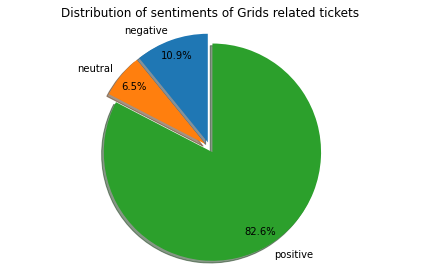

In [57]:
labels = ['negative', 'neutral', 'positive']
sizes = [5, 3, 38]

# explode all the slides, specially for the "Wap" slide which is too tiny to see
explode = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.85)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.title('Distribution of sentiments of Grids related tickets ')
plt.tight_layout()
plt.show()

In [110]:
pd.set_option('display.max_colwidth', -1)
grids_ticket[grids_ticket['sentiment'] == 'negative'][['text_ticket']]

,text_ticket
373,"how do you delete a column in miro grids? i do not see a trash bin icon on the grid toolbar that pops up. an error comes up about deleting child node when parent node is in edit mode, but how do you exit edit mode then?"
1023,"i like the new grids, but found it awkward that i couldn't center text vertically in a cell. i wanted to put in text row labels, but the text always floats to the top of the cell, so it looks weird when the next cells contain sticky notes."
1874,"""adding this type of widget to this area is not supported""\n\nallow a way to convert grids into a flattened version so we can put them in order grids or allow grids to be put into grids.\n\nright now miro is preventing us from putting grids in grids. it's creating workflow problems. we use grids to ideate and we also use grids to organize content."
2431,"понравилось описание функционала miro grids, хочу использовать.\nв видео все хорошо, но по факту - создаю grid, начинаю писать текст. сначала выглядит как в описании, но до первых попыток изменить форматирование. дальше grid становится абсолютно неработоспособным - никакие изменения не сохраняются, он ""застревает"" в текущем состоянии, больше с ним работать нельзя. добавляю видео запись экрана - первые вставки работают, дальше видно что после попыток отформатировать текст по центру - изменения перестают сохраняться совсем"
2503,2 problems. 1. border around grids. i cannot change the grey colour. 2. i removed text for a screenshot but i cannot undo the removal. that does work elsewhere\n\nreal email: dccrowley@gmail.com\nreal name: don crowley\nreal id: 3074457347249891718\n\n ![](https://mandrillapp.com/track/open.php?u=30166792&id=faa7d94625ab433db7f2a30306926459)


In [111]:
grids_ticket[grids_ticket['sentiment'] == 'neutral'][['text_ticket']]

,text_ticket
1508,need this feature:https://help.miro.com/hc/en-us/articles/360011986519-grids\n\nreal email: kmccarthy@neverfail.com\nreal name: kevin mccarthy\nreal id: 3074457345757858358\n\n ![](https://mandrillapp.com/track/open.php?u=30166792&id=2f0520a99196481483c5a2f16d3909d7)
2289,"i don't seem to be able to rename grids. it lets me delete the text and add my own, but when i click away, it just reverts to 'new grid'\n\nreal email: richard.moss@waverley.gov.uk\nreal name: richard moss\nreal id: 3074457347935397495\n\n ![](https://mandrillapp.com/track/open.php?u=30166792&id=4514243fa8e94301a6b0b2a11b7745ee)"
3418,"hi there, i see a post on your blog about the miro grids feature, but i can't seem to find it when i click the three dots as the article suggests. how do i access it?"


<a id='Question16'></a>

### Question 16: What are the main topic of these tickets?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [596]:
grids_ticket['text_tokens'] = grids_ticket['clean_ticket_text'].apply(tokenize)

In [597]:
text_data = grids_ticket['text_tokens']
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [578]:
import gensim
NUM_TOPICS = 46
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(31, '0.066*"real" + 0.043*"feature" + 0.038*"would" + 0.036*"beta" + 0.033*"love" + 0.033*"use" + 0.027*"miro" + 0.026*"grs" + 0.021*"access" + 0.020*"name"')
(43, '0.001*"miro" + 0.001*"board" + 0.001*"template" + 0.001*"team" + 0.001*"link" + 0.001*"taylor" + 0.001*"also" + 0.001*"andrew" + 0.001*"one" + 0.001*"ppi"')
(29, '0.001*"board" + 0.001*"also" + 0.001*"miro" + 0.001*"text" + 0.001*"one" + 0.001*"add" + 0.001*"team" + 0.001*"list" + 0.001*"work" + 0.001*"andrew"')
(20, '0.034*"board" + 0.021*"miro" + 0.018*"template" + 0.015*"team" + 0.013*"link" + 0.013*"andrew" + 0.012*"taylor" + 0.010*"one" + 0.010*"like" + 0.010*"question"')
(32, '0.046*"workshop" + 0.035*"editor" + 0.035*"guest" + 0.023*"miro" + 0.023*"able" + 0.023*"problem" + 0.012*"follow" + 0.012*"relating" + 0.012*"interactive" + 0.012*"fix"')
(9, '0.099*"real" + 0.033*"name" + 0.025*"grs" + 0.025*"table" + 0.025*"feature" + 0.017*"ben" + 0.017*"get" + 0.017*"know" + 0.017*"beta" + 0.017*"help"')
(6, '0.052*"text" 

In [579]:
import pyLDAvis.gensim

In [580]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

<a id='Question17'></a>

### Question 17: What are the most frequent keywords appear in these tickets?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

In [601]:
unigram = pd.DataFrame()
for sentiment in grids_ticket['sentiment']:
    sentiment_series = grids_ticket[grids_ticket['sentiment'] == sentiment]['text_tokens']
    counters = {}
    for row in sentiment_series:
        for w in row:
            if w in counters:
                counters[w] += 1
            else:
                counters[w] = 1
    score_tmp = pd.DataFrame.from_records(list(counters.items()), columns=['word', 'count'])
    score_tmp = score_tmp.sort_values('count',ascending = False).head(15)

    score_tmp['sentiment'] = sentiment
    unigram = pd.concat((unigram, score_tmp))
unigram.head(15)

,word,count,sentiment
3,grs,12,negative
25,text,4,negative
27,cell,3,negative
2,miro,3,negative
130,real,3,negative
70,v,3,negative
8,gr,3,negative
29,put,3,negative
15,node,2,negative
88,dal,2,negative


In [608]:
bigram_counts_sentiment = pd.DataFrame()

for sentiment in grids_ticket['sentiment']:
    sentiment_series = grids_ticket[grids_ticket['sentiment'] == sentiment]['text_tokens']
    counters = {}
    n = 2
    for row in sentiment_series:
        bigrams = ngrams(row, n)
        for w in bigrams:
            w = ' '.join(w)
            if w in counters:
                counters[w] += 1
            else:
                counters[w] = 1
    score_tmp= pd.DataFrame.from_records(list(counters.items()), columns=['word', 'count'])
    score_tmp = score_tmp.sort_values('count', ascending = False).head(15)

    score_tmp['sentiment'] = sentiment
    bigram_counts_sentiment = pd.concat((bigram_counts_sentiment, score_tmp))

bigram_counts_sentiment['count'] = bigram_counts_sentiment['count'].astype(np.int64)
bigram_counts_sentiment.head(10)

,word,count,sentiment
2,miro grs,2,negative
18,edit mode,2,negative
74,use grs,2,negative
0,delete column,1,negative
112,nikakie izmeneniia,1,negative
105,izmenit formatirovanie,1,negative
106,formatirovanie dal,1,negative
107,dal gr,1,negative
108,gr stanovitsia,1,negative
109,stanovitsia absoliutno,1,negative


In [607]:
trigram_counts_sentiment = pd.DataFrame()

for sentiment in grids_ticket['sentiment']:
    sentiment_series = grids_ticket[grids_ticket['sentiment'] == sentiment]['text_tokens']
    counters = {}
    n = 3
    for row in sentiment_series:
        bigrams = ngrams(row, n)
        for w in bigrams:
            w = ' '.join(w)
            if w in counters:
                counters[w] += 1
            else:
                counters[w] = 1
    score_tmp= pd.DataFrame.from_records(list(counters.items()), columns=['word', 'count'])
    score_tmp = score_tmp.sort_values('count', ascending = False).head(15)

    score_tmp['sentiment'] = sentiment
    trigram_counts_sentiment = pd.concat((trigram_counts_sentiment, score_tmp))
    
trigram_counts_sentiment.head(10)

,word,count,sentiment
0,delete column miro,1,negative
81,funktsionala miro grs,1,negative
103,pervykh popytok izmenit,1,negative
104,popytok izmenit formatirovanie,1,negative
105,izmenit formatirovanie dal,1,negative
106,formatirovanie dal gr,1,negative
107,dal gr stanovitsia,1,negative
108,gr stanovitsia absoliutno,1,negative
109,stanovitsia absoliutno nerabotosposobnym,1,negative
110,absoliutno nerabotosposobnym nikakie,1,negative


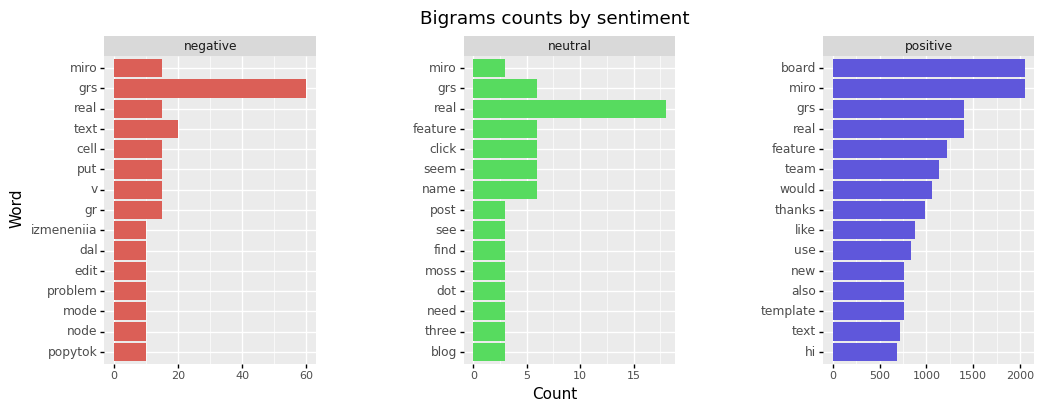

<ggplot: (184505176303)>

In [606]:
ggplot(unigram, aes(x="reorder(word, count)", y='count', fill = 'sentiment')) + \
    geom_col() + \
    facet_wrap(['sentiment'],scales = "free", ncol = 5) + \
    coord_flip() + \
    labs(title = "Bigrams counts by sentiment", x = "Word", y = "Count") + theme(subplots_adjust={'wspace': 0.7}) +\
    theme(axis_text_x = element_text(size=8)) + theme(figure_size = (12,4)) + theme(legend_position='none')

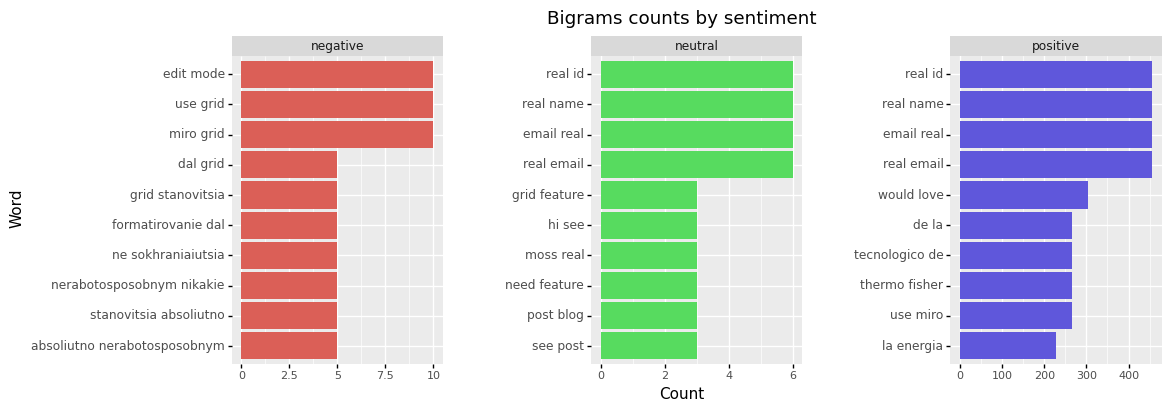

<ggplot: (-9223371852335712533)>

In [605]:
ggplot(bigram_counts_sentiment, aes(x="reorder(word, count)", y='count', fill = 'sentiment')) + \
    geom_col() + \
    facet_wrap(['sentiment'],scales = "free", ncol = 5) + \
    coord_flip() + \
    labs(title = "Bigrams counts by sentiment", x = "Word", y = "Count") + theme(subplots_adjust={'wspace': 0.7}) +\
    theme(axis_text_x = element_text(size=8)) + theme(figure_size = (12,4)) + theme(legend_position='none')

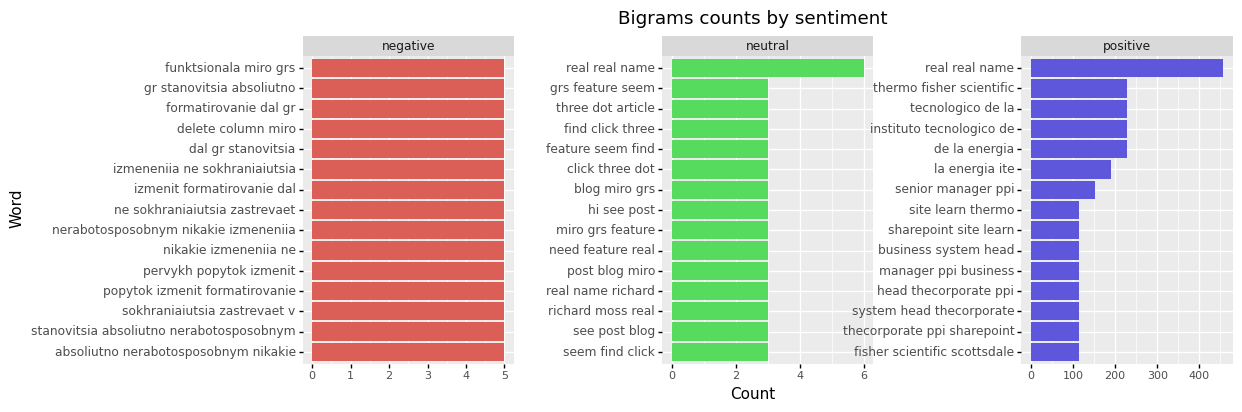

<ggplot: (184505748926)>

In [609]:
ggplot(trigram_counts_sentiment, aes(x="reorder(word, count)", y='count', fill = 'sentiment')) + \
    geom_col() + \
    facet_wrap(['sentiment'],scales = "free", ncol = 5) + \
    coord_flip() + \
    labs(title = "Bigrams counts by sentiment", x = "Word", y = "Count") + theme(subplots_adjust={'wspace': 0.7}) +\
    theme(axis_text_x = element_text(size=8)) + theme(figure_size = (12,4)) + theme(legend_position='none')

Translation of follwing sentense:

delete column miro	1	negative
116	zastrevaet v tekushchem	1	**negative stuck in the current**

108	grid stanovitsia absoliutno	1	**negative the grid becomes absolutely**

109	stanovitsia absoliutno nerabotosposobnym	1	**negative becomes completely inoperative**

110	absoliutno nerabotosposobnym nikakie	1	**negative absolutely inoperable no**

111	nerabotosposobnym nikakie izmeneniia	1	**negative inoperable no changes**

112	nikakie izmeneniia ne	1	**negative no changes**

113	izmeneniia ne sokhraniaiutsia	1	**negative changes are not saved**

114	ne sokhraniaiutsia zastrevaet	1	**negative not saved gets stuck**

115	sokhraniaiutsia zastrevaet v 1 **persist stuck**



### Insights
    The grids is inoperative
    cannot save the changes
    cannot delete columns
    cannot enter the text vertically in cell
    allow grids in grids

### What are the most relevant keywords appear in these tickets?

In [45]:
grids_ticket.head()

,user_id,text_ticket,clean_ticket_text
373,NaN,how do you delete a column in miro grids? i do...,how do you delete a column in miro grids i do...
475,NaN,![](https://help.miro.com/attachments/token/1m...,good morning i m writing...
486,NaN,good question. let me loop in our support team...,good question let me loop in our support team...
859,3074457347342187525,this is a follow-up to your previous request #...,this is a follow up to your previous request ...
976,3074457345968763916,"hi i have just discovered grids in miro, and ...",hi i have just discovered grids in miro and l...


In [588]:
def plot_tfidf_sentiment(df_d, sentiment, color):
    
    score1_Tfidf=df_d[df_d['sentiment'] == sentiment][['clean_ticket_text']]

    tfIdfVectorizer=TfidfVectorizer(use_idf=True, stop_words='english')
    tfIdf = tfIdfVectorizer.fit_transform(score1_Tfidf['clean_ticket_text'])
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF')
    df.reset_index(inplace = True)
    df = df.rename(columns = {'index': 'word'})
    Tfidf_score1_bi = df.tail(15)

   # print(Tfidf_score1_bi.sort_values('TF-IDF', ascending = False))

    ax = Tfidf_score1_bi.plot(x='word', y='TF-IDF',kind='barh', \
                  figsize=(5,4), fontsize=12, width =0.8, color = color)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
    ax.set_title("15 Most relevant words in tickets " + str(sentiment) +' sentiment', fontdict={'fontsize': 15, 'fontweight': 'medium'})

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')

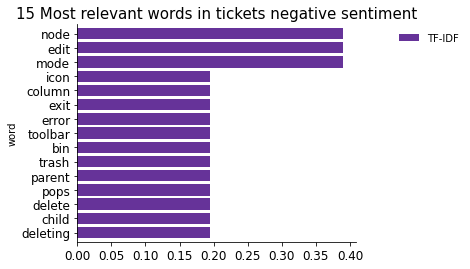

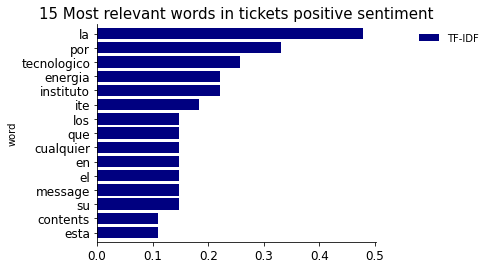

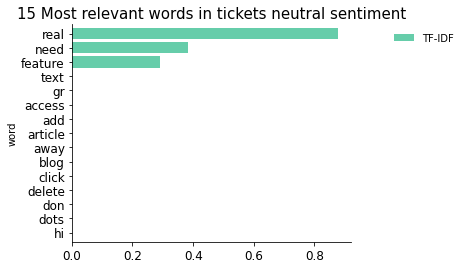

In [591]:
plot_tfidf_sentiment(grids_ticket, 'negative', 'rebeccapurple')
plot_tfidf_sentiment(grids_ticket, 'positive', 'navy')
plot_tfidf_sentiment(grids_ticket, 'neutral', 'mediumaquamarine')

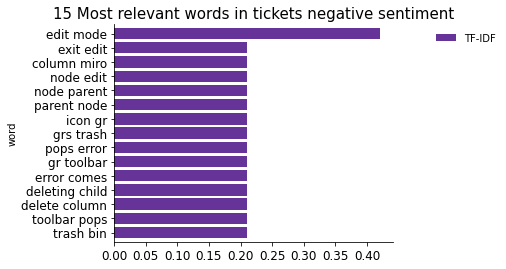

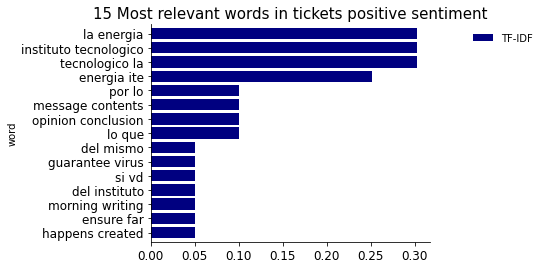

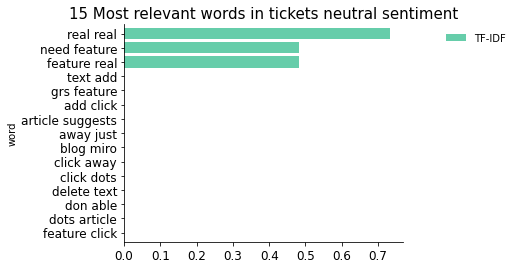

In [592]:
def plot_tfidf_sentiment_bi(df_d, sentiment, color):
    
    score1_Tfidf=df_d[df_d['sentiment'] == sentiment][['clean_ticket_text']]

    tfIdfVectorizer=TfidfVectorizer(use_idf=True, stop_words='english', ngram_range=(2,2))
    tfIdf = tfIdfVectorizer.fit_transform(score1_Tfidf['clean_ticket_text'])
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF')
    df.reset_index(inplace = True)
    df = df.rename(columns = {'index': 'word'})
    Tfidf_score1_bi = df.tail(15)

   # print(Tfidf_score1_bi.sort_values('TF-IDF', ascending = False))

    ax = Tfidf_score1_bi.plot(x='word', y='TF-IDF',kind='barh', \
                  figsize=(5,4), fontsize=12, width =0.8, color = color)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
    ax.set_title("15 Most relevant words in tickets " + str(sentiment) +' sentiment', fontdict={'fontsize': 15, 'fontweight': 'medium'})

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
plot_tfidf_sentiment_bi(grids_ticket, 'negative', 'rebeccapurple')
plot_tfidf_sentiment_bi(grids_ticket, 'positive', 'navy')
plot_tfidf_sentiment_bi(grids_ticket, 'neutral', 'mediumaquamarine')

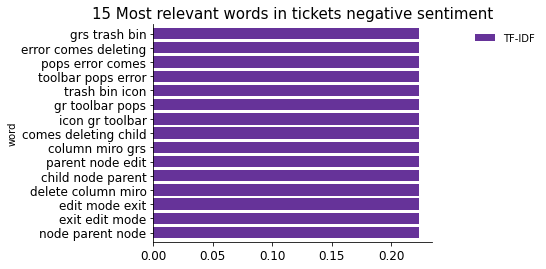

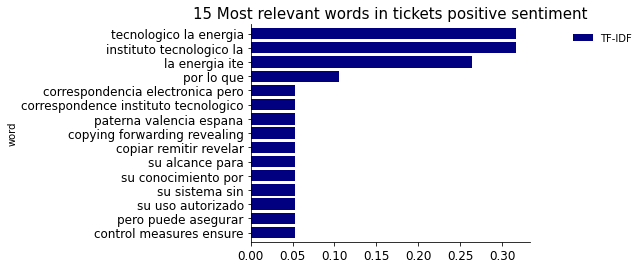

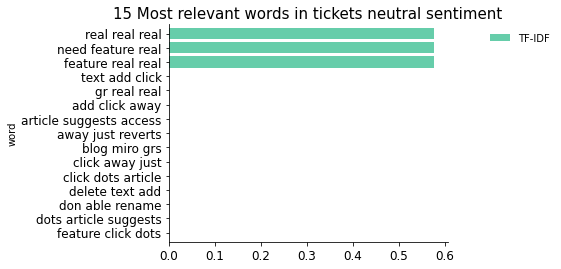

In [593]:
def plot_tfidf_sentiment_tri(df_d, sentiment, color):
    
    score1_Tfidf=df_d[df_d['sentiment'] == sentiment][['clean_ticket_text']]

    tfIdfVectorizer=TfidfVectorizer(use_idf=True, stop_words='english', ngram_range=(3,3))
    tfIdf = tfIdfVectorizer.fit_transform(score1_Tfidf['clean_ticket_text'])
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF')
    df.reset_index(inplace = True)
    df = df.rename(columns = {'index': 'word'})
    Tfidf_score1_bi = df.tail(15)

   # print(Tfidf_score1_bi.sort_values('TF-IDF', ascending = False))

    ax = Tfidf_score1_bi.plot(x='word', y='TF-IDF',kind='barh', \
                  figsize=(5,4), fontsize=12, width =0.8, color = color)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1), frameon=False)
    ax.set_title("15 Most relevant words in tickets " + str(sentiment) +' sentiment', fontdict={'fontsize': 15, 'fontweight': 'medium'})

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        
plot_tfidf_sentiment_tri(grids_ticket, 'negative', 'rebeccapurple')
plot_tfidf_sentiment_tri(grids_ticket, 'positive', 'navy')
plot_tfidf_sentiment_tri(grids_ticket, 'neutral', 'mediumaquamarine')

### Insights:
    error comes out while deleting child node
    exit edit mode
    cannot rename grids

<a id='Question18'></a>

### Question 18: How can we use these text analysis and demographic analysis to give improvement suggestion for product team?

<a href="#Before-start-our-analysis,-I-think-that-is-important-to-think-about-some-business-questions:">Back up</a>

## Main findings

### Product

#### Grids
    - Add option of create grids into grids cells
    - Allow copy and paste the same format into another cells
    - Allow user to be able to insert one single cell when they insert a grid.      
    - Improve grids click, select, insert, rotation, save issue in Miro android app. Check the usability of grids in android app.
    - Don't set row limitations on grids
    - Add basic calculation formula in grids
    - Make cell size more adjustable, can be minimize until less than one line size. (Right now the minimum size is 2 lines size)
    - Allow users be able to resize all the columns once (like in excel sheet)
    - Add features like merge multiple cells into one, vertically and horizontally
    - Make sure export csv option is always working fine
    - Make sure saving option is always working fine
    - Automatically order the content in grids, be able to change text type.
    - Give option to make texts vertical in cells
    - Give option of vertical alignment, groups inside cells, padding, cell spacing
    - Allow SVG files to be inserted
    - Make background color icon more obvious and understandable.
    
    
#### Template
    - Make a more understandable or visual template icon of template
    - Add more templates specially small templates
    - Add timeline templates

   
#### Cards
    - Add more features on cards, votes, ranking, pseudo markdown, summary, list, ordering...
    - Allow user filter on the cards owners
    
#### Voting
    - Make voting function more visual and easy to see, right now people saying zoom voting is confusing.
    - Make votes can be appeared in sticky notes.


#### Others
    - Give more flexible and easier option to use pen on app for tablet. 
    - Set notification for android app if someone changes something on the board. Check Miro android log problem, it is easy to become very slow and get crashed, and difficult to zoom in/out.
    - leave a small '?' icon if someone needs help
    - library of icons(explains what does each icon means
    - when change/edit one place it can reflect in everywhere
    - Add seconds when the timer countdown
    - Add more obvious icon or notification to others on board when there is a video chat they could join

### Service:
    -More guidance of templates, how to use it
    -Constantly check android app customers feedbacks.















